In [599]:
%matplotlib inline
import os
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
c=2.998e8 #speed of light
import time
filepath='C:/measuring/'#only for local 
import scipy.signal
os.chdir(filepath)

data_dir= 'W:\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/20160825\spectrometer/OND_RT_POS2L6' # #RT_OFFD_POS4_L6#'D:\measuring\data/20160503\ON diamond\pos 7/raw data spectrometer\L9'#'D:\measuring\data/20160707\CL2_newmirror_processed'#"/Users/suzannevandam/Documents/PhD/localdata/20160430/ON_diamond" 
print data_dir

%matplotlib inline

W:\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/20160825\spectrometer/OND_RT_POS2L6


In [600]:
import analysis.scripts.cavity.spectrometer_analysis as sa
import analysis.scripts.cavity.spectrometer_analysis_2Dsweep as spectrometer_analysis_2Dsweep

In [601]:
ana_pars = {}

# Finding the cavity length from a 2D plot on diamond

1. load the data from data_dir containing your 2D sweep data, and check if it looks fine

In [602]:
ana_pars['V_min']=0.2
ana_pars['V_max']=10
ana_pars['min_frq']=432
ana_pars['max_frq']=498
ana_pars['laser_wavelength']=636.6e-9

In [603]:
reload(spectrometer_analysis_2Dsweep)
reload(sa)
sa_2D = spectrometer_analysis_2Dsweep.spectrometer_2D_analysis(data_dir,V_min=ana_pars['V_min'],V_max=ana_pars['V_max'],laser_wavelength=ana_pars['laser_wavelength'])
frequencies,filenumbers,intensities = sa_2D.get_data(min_frq=ana_pars['min_frq'],max_frq=ana_pars['max_frq'])#load_data_from_folder(data_dir)
intensities = sa_2D.subtract_offset()
sa_2D.save_analysis_params(ana_pars)

reloaded


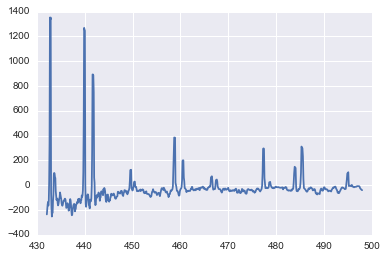

In [604]:
plt.plot(frequencies,intensities[:,30])

In [605]:
ana_pars['vmax']=1000#-10000
sa_2D.save_analysis_params(ana_pars)

saving figure as:
W:\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/20160825\spectrometer/OND_RT_POS2L6\2D_plot.png


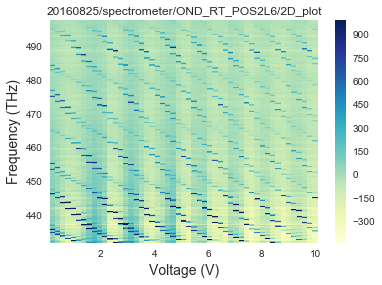

In [606]:
sa_2D.plot_data(aspect =0.1,vmax=ana_pars['vmax'])#,vmax=3000)#,vmax=300,vmin=150)

2. Find the peaks of one of the spectrometer sweep, and check if your settings (especially: minimum_peak_height) is fine.
   check with 2D data if it works well 

In [617]:
ana_pars['minimum_peak_height']=-10 #the minimum height above average
ana_pars['minimum_peak_distance']=60 #units: number of datapoints
ana_pars['max_gamma']=2.5
ana_pars['g_gamma']=0.3
ana_pars['keep_same_height']=True #keep peaks closer together than min_peak_dist, if the same height(!)
ana_pars['max_height_diff'] = 1#1#0.2#120 #if keep_same_height, the max smaller the smaller one is allowed to be.
ana_pars['remove_hom']=True #remove the higher order modes 
ana_pars['hom_max']=5#maximum distance between higher order modes for one to be removed
ana_pars['fit_peaks']=False 
ana_pars['rescale_to_avg']=True
sa_2D.save_analysis_params(ana_pars)

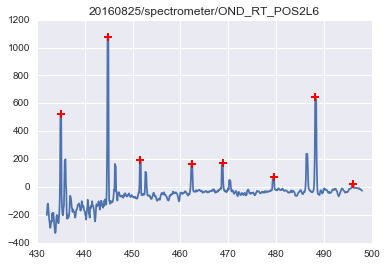

In [618]:
reload(sa)
x0s,u_x0s=sa_2D.peaks_from_1D_data(intensity=sa_2D.intensities[:,39],plot_peak_locations=True,    
                                   plot_fit=False,fit_peaks=ana_pars['fit_peaks'],
                                   max_gamma = ana_pars['max_gamma'],
                                   minimum_peak_height=ana_pars['minimum_peak_height'],
                                   minimum_peak_distance=ana_pars['minimum_peak_distance'],
                                   g_gamma=ana_pars['g_gamma'],hom_max=ana_pars['hom_max'],
                                      kpsh=ana_pars['keep_same_height'],
                                      remove_hom=ana_pars['remove_hom'],
                                      max_height_diff = ana_pars['max_height_diff'],
                                      rescale_to_avg=ana_pars['rescale_to_avg'])


getting peak locations
[  0.2     0.2     0.2     0.2     0.2     0.2     0.2     0.2     0.396
   0.396   0.396   0.396   0.396   0.396   0.396   0.396   0.592   0.592
   0.592   0.592   0.592   0.592   0.592   0.788   0.788   0.788   0.788
   0.788   0.788   0.788   0.788   0.984   0.984   0.984   0.984   0.984
   0.984   0.984   0.984   1.18    1.18    1.18    1.18    1.18    1.18
   1.18    1.18    1.376   1.376   1.376   1.376   1.376   1.376   1.376
   1.376   1.572   1.572   1.572   1.572   1.572   1.572   1.572   1.768
   1.768   1.768   1.768   1.768   1.768   1.768   1.768   1.964   1.964
   1.964   1.964   1.964   1.964   1.964   1.964   2.16    2.16    2.16
   2.16    2.16    2.16    2.16    2.356   2.356   2.356   2.356   2.356
   2.356   2.356   2.356   2.552   2.552   2.552   2.552   2.552   2.552
   2.552   2.552   2.748   2.748   2.748   2.748   2.748   2.748   2.748
   2.748   2.944   2.944   2.944   2.944   2.944   2.944   2.944   2.944
   3.14    3.14    3.14    3.1

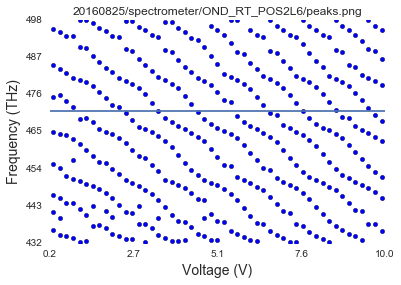

In [619]:
x,y = sa_2D.peaks_from_2D_data(plot_peak_locations=False,
                                      return_peak_locations = True, fit_peaks = ana_pars['fit_peaks'],
                                     max_gamma = ana_pars['max_gamma'],
                                   minimum_peak_height=ana_pars['minimum_peak_height'],
                                   minimum_peak_distance=ana_pars['minimum_peak_distance'],
                                   g_gamma=ana_pars['g_gamma'],hom_max=ana_pars['hom_max'],
                                      kpsh=ana_pars['keep_same_height'],
                                      remove_hom=ana_pars['remove_hom'],
                                      max_height_diff = ana_pars['max_height_diff'],
                                      rescale_to_avg=ana_pars['rescale_to_avg'])
sa_2D.plot_peaks(save_fig=True)

ana_pars['x_peak']=x
ana_pars['y_peak']=y

In [616]:
ana_pars['conversion_factor']=307e-9#307e-9#RT #123e-9#LT
ana_pars['g_diamond_thickness']=3.9166e-6#
ana_pars['g_air_length']=2.45e-6#
ana_pars['mode_type']='diamond_air_modes'
sa_2D.save_analysis_params(ana_pars)

#dirty way, fix required!
ana_pars['diamond_thickness']=3.9166e-6#
ana_pars['air_length']=2.45e-6#

In [241]:
############guess overlaps peaks and modes
reload()
sa_2D.plot_peaks_and_modes(conversion_factor=ana_pars['conversion_factor'],
                                      diamond_thickness=ana_pars['g_diamond_thickness'],
                                      air_length=ana_pars['g_air_length'],plot_fit=False,
                                      mode_type=ana_pars['mode_type'],save_fig=False)


TypeError: reload() takes exactly one argument (0 given)

In [ ]:
################### plot single mode

sa_2D.get_slope(conversion_factor=ana_pars['conversion_factor'],
                                      diamond_thickness=ana_pars['diamond_thickness'],
                                      air_length=ana_pars['air_length'],nr_points = 101)

overlapping diamond air modes
W:\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/20160825\spectrometer/OND_RT_POS2L6\diamond_air_modes_d=4.064um_L=5.04um_overlap_peaks.png


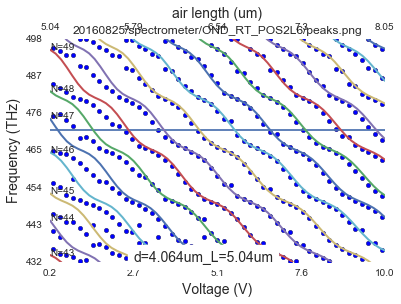

In [625]:
############plot overlaps peaks and modes
sa_2D.plot_peaks_and_modes(conversion_factor=ana_pars['conversion_factor'],
                                      diamond_thickness=ana_pars['diamond_thickness'],
                                      air_length=ana_pars['air_length'],plot_fit=False,
                                      mode_type=ana_pars['mode_type'])


3. determine from the plot above which min_voltage and min_frequency you want to use.
check if diamond and air modes are plottted. 
later you can come back here to plot the overlap of peaks and modes for your best outcome.

In [ ]:
###############overlaps plot and modes
sa_2D.plot_2dplot_and_modes(conversion_factor=ana_pars['conversion_factor'],
                                      diamond_thickness=ana_pars['diamond_thickness'],
                                      air_length=ana_pars['air_length'],plot_fit=False,
                                      mode_type=ana_pars['mode_type'],vmax=ana_pars['vmax'])# min_frequency=450, 307.e-9
#4.719

In [ ]:
###############overlaps plot,peaks and modes
sa_2D.plot_2dplot_peaks_and_modes(conversion_factor=ana_pars['conversion_factor'],
                                      diamond_thickness=ana_pars['diamond_thickness'],
                                      air_length=ana_pars['air_length'],plot_fit=False,
                                      mode_type=ana_pars['mode_type'],vmax=ana_pars['vmax'])# min_frequency=450, 307.e-9

Now: determine which diamond thicknesses and air lengths you want to check, and find the mean squares.
Plot the mean squares to check if the answer is as expected.
Then go back to the above function to see if indeed this gives a good overlap.

In [620]:
ana_pars['conversion_factor']=307e-9#307e-9#RT #123e-9#LT
ana_pars['mode_type']='diamond_air_modes'
ana_pars['min_voltage']=4
ana_pars['min_frequency']=420
ana_pars['diamond_thicknesses']=np.linspace(3.7e-6,4.3e-6,301)#81)
ana_pars['air_lengths']=np.linspace(4e-6,7e-6,301)#241)#201)
#sa_2D.save_analysis_params(ana_pars)

In [621]:
ms_overlaps, u_ms_overlaps = sa_2D.find_best_overlap_peaks_and_modes(ana_pars['diamond_thicknesses'],
                                                    ana_pars['air_lengths'],
                                                      conversion_factor=ana_pars['conversion_factor'],
                                                      min_voltage =ana_pars['min_voltage'],
                                                      min_frequency=ana_pars['min_frequency'],
                                                      mode_type=ana_pars['mode_type'])



diamond thickness 1 out of  301 done. estimated time remaining:  7578 s
diamond thickness 6 out of  301 done. estimated time remaining:  7348 s
diamond thickness 11 out of  301 done. estimated time remaining:  6821 s
diamond thickness 16 out of  301 done. estimated time remaining:  6580 s
diamond thickness 21 out of  301 done. estimated time remaining:  6365 s
diamond thickness 26 out of  301 done. estimated time remaining:  6136 s
diamond thickness 31 out of  301 done. estimated time remaining:  5923 s
diamond thickness 36 out of  301 done. estimated time remaining:  5736 s
diamond thickness 41 out of  301 done. estimated time remaining:  5586 s
diamond thickness 46 out of  301 done. estimated time remaining:  5442 s
diamond thickness 51 out of  301 done. estimated time remaining:  5318 s
diamond thickness 56 out of  301 done. estimated time remaining:  5214 s
diamond thickness 61 out of  301 done. estimated time remaining:  5089 s
diamond thickness 66 out of  301 done. estimated time

In [622]:
ix_min_mean_square_overlap = np.unravel_index(ms_overlaps.argmin(), ms_overlaps.shape)
ana_pars['ms_overlaps']=ms_overlaps
ana_pars['lowest_ms_overlap']=ms_overlaps[ix_min_mean_square_overlap]
ana_pars['u_lowest_ms_overlap']=u_ms_overlaps[ix_min_mean_square_overlap]
ana_pars['diamond_thickness']=ana_pars['diamond_thicknesses'][ix_min_mean_square_overlap[0]]
ana_pars['air_length']=ana_pars['air_lengths'][ix_min_mean_square_overlap[1]]
sa_2D.save_analysis_params(ana_pars)

lowest mean square error ( 0.423316645305 +- 0.0707256992284 ) is found for:
diamond thickness:  4.064 um
air length:  5.04 um
total cavity length: 9.104 um


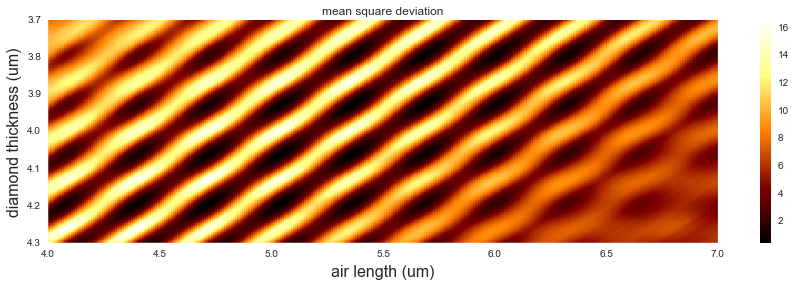

In [623]:
ix_min_mean_square_overlap = np.unravel_index(ms_overlaps.argmin(), ms_overlaps.shape)
print 'lowest mean square error (',ms_overlaps[ix_min_mean_square_overlap], '+-',u_ms_overlaps[ix_min_mean_square_overlap],') is found for:'
print 'diamond thickness: ',ana_pars['diamond_thicknesses'][ix_min_mean_square_overlap[0]]*1.e6, 'um'
print 'air length: ',ana_pars['air_lengths'][ix_min_mean_square_overlap[1]]*1.e6, 'um'
print 'total cavity length:', (ana_pars['diamond_thicknesses'][ix_min_mean_square_overlap[0]]+ana_pars['air_lengths'][ix_min_mean_square_overlap[1]])*1.e6, 'um'


fig,ax = plt.subplots(figsize=(15,4))
ax.set_xlabel('air length (um)',fontsize =16)
ax.set_ylabel('diamond thickness (um)',fontsize = 16)
ax.set_title('mean square deviation')
extent = [ana_pars['air_lengths'][0]*1.e6,ana_pars['air_lengths'][-1]*1.e6,ana_pars['diamond_thicknesses'][-1]*1.e6,ana_pars['diamond_thicknesses'][0]*1.e6]
im = ax.imshow(ms_overlaps, extent=extent, interpolation='None', cmap='afmhot',aspect='auto')
ax.grid(False)

plt.colorbar(im)  

fig.savefig(os.path.join(data_dir, 'overlap_mean_square_deviations.png'))


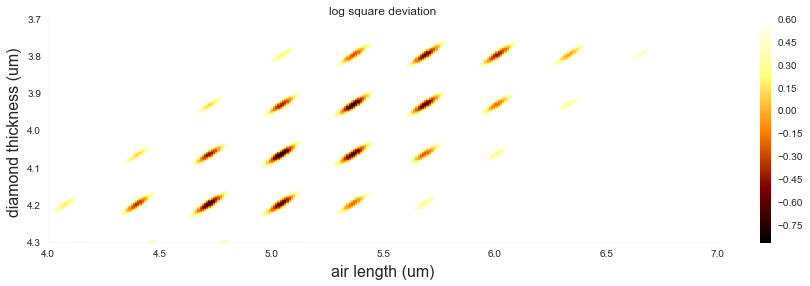

In [624]:
# you can plot the mean square deviation on a log scale to make things more clear. although here vmax is still useful.

fig,ax = plt.subplots(figsize=(15,4))
ax.set_xlabel('air length (um)',fontsize =16)
ax.set_ylabel('diamond thickness (um)',fontsize = 16)
ax.set_title('log square deviation')
ax.grid(False)
extent = [ana_pars['air_lengths'][0]*1.e6,ana_pars['air_lengths'][-1]*1.e6,ana_pars['diamond_thicknesses'][-1]*1.e6,ana_pars['diamond_thicknesses'][0]*1.e6]
im = ax.imshow(np.log(ms_overlaps), extent=extent, interpolation='None', cmap='afmhot',aspect='auto',vmax=0.6)

plt.colorbar(im)  

fig.savefig(os.path.join(data_dir, 'overlap_log_mean_square_deviations.png'))


In [ ]:

ix_min_mean_square_overlap = np.unravel_index(ms_overlaps.argmin(), ms_overlaps.shape)
print 'lowest mean square error (',ms_overlaps[ix_min_mean_square_overlap], '+-',u_ms_overlaps[ix_min_mean_square_overlap],') is found for:'
print 'diamond thickness: ',ana_pars['diamond_thicknesses'][ix_min_mean_square_overlap[0]]*1.e6, 'um'
print 'air length: ',ana_pars['air_lengths'][ix_min_mean_square_overlap[1]]*1.e6, 'um'
print 'total cavity length:', (ana_pars['diamond_thicknesses'][ix_min_mean_square_overlap[0]]+ana_pars['air_lengths'][ix_min_mean_square_overlap[1]])*1.e6, 'um'


fig,ax = plt.subplots()
ax.set_xlabel('air length (um)',fontsize =16)
ax.set_ylabel('mean square deviation')
ax.plot(ana_pars['air_lengths'],ms_overlaps[0])

In [ ]:
#save the ms overlaps
copy_ms_overlaps=ms_overlaps

f = open(os.path.join(data_dir,'ms_overlaps.txt'), 'w')
np.savetxt(f,copy_ms_overlaps)
f.close()



In [ ]:
# If you want, you can plot several of the manual overlaps, fdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXkAAADtCAYAAABagwXcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJztnXe4FOX1xz+DBZViiTVRYz8aC8aKiLEES1QUNWrsgRBLjF2xRH8Ye1CxRaMJghp719ijqFE0arAbOTbU2LtYUMqd3x/nnXuHZXfvLDt7t3A+z7PPzE55z7tz955598x5vyeK4xjHcRynNelW7w44juM4tcOdvOM4TgvjTt5xHKeFcSfvOI7TwriTdxzHaWHcyTuO47Qwc9a7A47jOE1GJXnnUc16kRF38o7jOBXRVsGx9Q+WuJN3HMepCHfyjuM4LUwlTr7+uJN3HMepiGkVHDt3zXqRFXfyjuM4FeEjecdxnBbGnbzjOE4L407ecRynhXEn7ziO08K4k3ccx2lh3Mk7juO0MJWkUNYfd/KO4zgV4SN5x3GcFsadvOM4TgvjTt5xHKeFcSfvOI7TwuTj5EUkAi4C+gDfAUNV9Y3U/t2Ao4DJwI2qek5n5xSj/jqYjuM4TUVbBa+yDAK6q2o/4FhgZLJDRBYCTgM2BfoD24vImuXOKYU7ecdxnIqYVsGrLP2BewBU9QlgndS+5YFnVfVLVY2BfwMbd3JOUdzJO47jVERuI/newJep99NEJPHJrwKrisgiIjIf8HNgPqBXmXOK4k7ecRynInJz8pMwp53QTVXbAFT1C+Bw4CbgKmA88Em5c0rhTt5xHKcicnPy44CtAUSkL/BCskNE5gTWUdWfAbtiD1ofAB4rdU4pPLvGcRynInJLobwF2FxExoX3g0NGTQ9VHSUi00VkPBbcv0RV3xCRiYXndGYkiuM4rw47juPMBvynAqe5TlS7fmTDR/KO4zgV4ZOhHMdxWhhXoXQcx2lhfCTvOI7TwrSgkxeR+YFtsSm2ywDzA58CbwP3Afeq6lc16qPjOE4D0VxOvmx2jYgsAvwBS9OZE3gZeAv4FlgQ+BGwGvA9cAkwQlU/rHGfHcdx6sjYCrJrNmvc7BoR2RsYATwE7APcrarfFzmuBzAAGAK8KCJHqurltemu4zhOvWmukXy5cM1AYENVfb1cA6r6DXAbcJuIrIwpp7mTdxynRWmu7BqfDOU4jlMRd1XgNLdu3HBNMUSkN7BAsX2q+nYuPXIcx2loWidc046IrAP8HVipyO4IiIE5cuyX4zhOg9KCTh74KzAX8FssddJxHGc2pTWdvAA7quq9teyM4zhO49OaTn48sGwtO+I4jtMctKaT3w+4WUR+gDn8bwsPUNV/5dkxx3GcxqS5UiizOvmVgSWBk0vs9wevjuPMJrTmSP4sbAR/GuCyBY7jzMa0ppNfHPitqo6tZWccx3Ean+Zy8lkLeT8G/LSWHXEcx2kOcivk3SVkHcn/GRglIssCTwEzyQqr6s15dsxxHKcxaQznnZWsTv6WsPxdif3+4NVxnNmE1nTyniPvOI4D5JVCKSIRcBHQB/gOGKqqb4R9iwHXYgPoCFgTOFpV/yoi44EvQzMTVfU35exkcvKq+tYsfQrHcZyWI7eR/CCgu6r2E5H1gZFhG6H40qYAItIXOAX4m4h0D/s3y2okq0BZp1k1lRh1HMdpXnJz8v2BewBU9YkgBFmMC4DdVDUWkT5ADxG5FwuR/0FVnyhnJGt2zSTs50H6NR1YAyv/Nz5jO47jOE1Obtk1vekIuwBME5EZfLKIDAReVNXXwqZvgTNVdUvgAOCqwnMKyRquGVRseyj9dzvwRZZ2HMdxmp/cRvKTgF6p991UtbDxPYFzU+9fAV4DUNVXReRTYAng3VJGso7kixJK/50JHFhNO059EZGNReSFevejXojIVyKy9Cyeu5+IDMtw3L0islBYvyOUynSaktxG8uOAraE97l7sf3AdVX089X4wcHY454fYTeL9ckYqqgxVgkWwnx1OczM714Gc5c+uqpdkPHTz1Dnbzqo9pxHIbSR/C7C5iIwL7weLyG5AD1UdJSILM2M4B+BSYLSI/Av73g4pMvqfgawPXg8vsrkb8EPsznJflnacxieUeLwQS9lqwx4MHauqbSKyNXAGlkP2HDAAK/b+dkEbfwS2B6ZgRWZ+raofishOwElYXPEu4DhVnUtE9gF+qaoDw/nt70VkJWwyXg/s+/YssKuqThGR77Ai8msAe4R2zwMWwh5Kna+qlxX5jBsB54fPN57UL1oR2RY4HiuS8y1wJPAk8BYwSFWfDsddAzyESX4srKoHhXOPDecuClyuqsNFZHRo/kER2QZ4BNhJVZ8WkX2Bg8I1/RD4vaq+JiJjsJ/zqwNLARPC555JAdbpavJJoVTVGIurp3kltf8TYK2Cc6YBe1diJ2u45qwirxHAEMwJlJok5TQfFwCfqOrqwDpYDu+RIdRwBbC7qq4FPIg53RkQkSWBQ4B1VXU9bACwvogsjo1CdlTVdbH/lPT3r3A0nbwfClymqhsCKwLLAduEfXMDt6nqKthN50Ysl3hdYBPgKBFZr6B/cwHXA4ep6tqhf/OGfStgIny/CPv2w0Zb84S+Dw7HLYjd4K4u6OthwN7hc28AHCciC6nqkLB/E1V9J9WXTbGbyMaq+lPgGuymlbAWsAWwCnatd8ZpAFpQ1kBVq4rdO03FVkA/AFWdKiIXA4diI4yXVPXFsO8KETm/yPnvYqPtZ0TkbuBuVR0bRvHPqaqG484HTszQn6Oxn7RHYTWGlwB6pvY/GpYrActjP2WjsG0eTHPpydTxqwNTVPWh8DluFJHPw77NsZH5A6k2pgErAGOAJ0XkMGA34B+q+pWIpPu6HbCtiOyBOWawXyCfhfWIGdkKuE5VPwt9uVxEzhWRH4f994SRG+GZyUKlL5PTdTSG885KSScvIsur6uuVNigiK6TSfZzmo/CG3g37nkwtsm+mb3v4CbqJiKyNjXbPEZEHsRFz+vypqfVkVl/C3Kn1a8N51wN3AEsXHPt1WM4BfB5+ZQAQfj18zowU2gJLB07aeEBVd0u1sTTwv5Cj/DQwEPg19muF1HHzYTe3m7BwzGhsYkvaVuGvlWKDp25YuAdgcif9dupCczn5ciP0O0XkvPAEt1NEZHkRuQiLtTrNy72EbKkwu25fzEE/BqwoIquFfTsB81PguERkDRF5EXhZVf8EnIPFzB8HVhCRNcOhg1OnfQysJiJzi8icmCNN2AI4SVVvwJzc+hTXSVLguzCKTsJGz1EQ08QyGCIR2SoctzWWPAAwFthCwvBcRLYEnsF+EQCMwn5ZzFuQ8QAWSuoJHK+qd2LhorlTfZ3GjDcvsGu9a3jAhogMxkJlPkhqaFonXLMW9pBtooj8G7gZeBr4H/ZAan6sWtQG2D/iBtjoZe1adtipOQcDF4TwwFzA3cBpqjpNRHYH/i4i07EHltMoKAWpqs+LyHXAeBH5Ouw/WFU/F5FdMDXTGHgpddp9wMOYo34Pi/evEfYdB9wqIh8Ab2Mj5RXCvvYbTAgtbQ+cH1Ia58Qc7gzOOHyOQcAlInIa5sQ/DPv+Gx6EXhv8/DRgoKomI+rbsYfSZxReNFV9TkTuBCaIyHtYetz40NeJWGz/0WA7DufcLyLnAGNDeOhjOp43lHpG4dSbtgqcdwMEuqM4Lv/dCfLChwK7YhkD6RMi7J/yVmBkIq7TSXvdgL8Bgt3q9lfV/6b2r0vIA8Xiu3ur6tSZGnK6FBHphWWdDFfV70Tkp8AdqvqjWWxvMeB9f97jNB3Tjs9+w53zlLqH2Dp98KqqE7H44yEi8hNgGWwU/ykWq3y5QpsDgVhV+4vIxlg2Q3pG7V+x9LI3RGQopoD5SpF2nC4kPGScAvxHRKZi6ZHVZnv46NRpPqZWkEKZx0ykKul0JF8LRKRbyLveB0srS1LTVsKkNydgmjh3qOpZXd5Bx3GcUnwzLLvT7DGi7iP5uvxUDg5+DDZx5arUroWx2P75WGbGABHZpOt76DiOU4K4LfurAahbPDSM3lfCHsTNGzZ/Crymqq+E/OB7sAk5JYntp4i//OUvf2V5VU9bW/ZXA9DlESMR2QtYUlVPx6qhTKcj1+gNoKeILBce4m6Epa2VJIrq/mvIcXIi8UF5f6dj2hOC4h7BxEH52opjeGUPW50+negn19k2gFz+R5Nrc2l4m0yPOCSn9iugQZx3Vro8Jh9G7ZdhMwvnxL59PekQ5dkE+FM4/DFVPayTJrv2AzhO05D8a0zBMjohFBsivxtJYuNpiB8J63k73hj7DAD/Cct+YVmxneo79tnB2X3OQufXfRSa2cmHPN6eqvpVeL8zNvvwTlWdULsudoo7eccpS/pfpBa/EsCmAiSloGvh1wr/zWfZRvWd+/B32X3OYhfV3clnismLyOrAm9hsP0TkbGy6+emYRsmmpc92HKe+RKlXrdpetoY20nZqaSMjTRaTz/rgdQTwEXC1WDWo/THBpnkwTZFTa9M9x3Gag7oPWLuOFnXy/YATwszULTHnPiqI1V+GydE6juO0Pk2WQpk1u6aNDqX8rYHPVPXf4f1CdCgBOo7jtDYNMkLPSlYn/zhWgOEHmIbNtQBBUXA4HY/uHcdxWpsWdfKHYlre12A6MieG7fdiNQiPymqwnEBZEK26FnuUHmEl6I5W1b9mbd9xHKemtKKTV9VXgsb2osBHoTAEWHz+xaR6TUZKCpSp6oeERF6x6uWnYDcEx3GcxmBaPjVeu4pKZ7x+mzj4VJ78ZEwHPBOqepuI/CO8XYaZK/ckXADslrqhOI5TM2I6Jp5/E5a9c24frB46wPthuUGONkrZWibf5qc310g+jzz5ZyvNky8jUJbYG4j9QvAKOY7TJURYEas5MOeep4NP2o8wh7sM5txr4eCL2cqZJkuhzDqSL5Unv29YnkrHPONMqOpgETkaK468Sqr6DsCewLmVtOc4rUMyEv0wLO8Pyz3IXY4gDtHQu0bBNqeEfVvkbGMUXD3C1nc/3JbR/uGYaj9PDHG4Tl+facte24d9P6uy7VIm83HeQUXgIiwF/TtgaLrwUrECSliWY8lzipHVyfcDdg3l0XYklScvIpdhD2WzfrByAmUJ6xSpoek4LU7iFN+25X+PtOWqQ8L+/IS+4vgvALzz2wMBWGq/bYDNc2g/sRERxzcC8NnB+/KDrdezXbk595Spt4+z9aWXCRs3yqftUuQ3Qh8EdFfVfiKyPjCSzgsordrJOTNRjzz5G4HLROThYP9QYEcRSQTKFsYydhynwYixcQnAvOUOnPXmAe7Y0ZYrSdiwVW6Nx7EJfI3bIjj3JcPudcaQy6gaiOMPiaLF+ezgXQCYMgXYKqhH5ql6CTD1hGAAiE7I10Yp8nPy/TE5dVT1CRFpl1UPBZQ+BQ4XkaSA0isisl+pc0rR5XnyISyza5n9n2BFxB2nAfk+LHN28nEMalK9fBDCD9veF3ZW77TafeLxNqJ+/XV7v+F9I4OJhau20X6TumUr2PFZXgtP1Na7awREq1bf/gxGxtri/fdghS5y7gn5OfnezDignZZUzaOjgNLvMAn2O0RkfCfnFCWPPPkvqCBP3nGakxiLLM5fg3YBHoJnxtvq0PNsGS2Uk4kYvhkGwMMP2aa9rx9oJqJDw0HVj+JjrgDgm8efo+eOsN6F+wQbR+bQfgFRKC299IEQrZRv251RSY3X8kwCeqXep511ewElABFJCih9WeacotQjT95xmpAk+yRnZ5X8J7U9CL8aFkztmLKZD9E/bgdgwOmb2fu1b8vXRgzRa/8EoMcRFnePlh2To43kQr0bluHharRkTu1XQH4j+XHAtsCNYV7QC6l9pQoovY7NNSp2TlEqKhoiIktjk5WWwITJlgJeUNXvyp1XYzyP3mlC0gU9gPgZiNYP2/LOoLkTpoZHaHOdHEzkXTTkRfsMAOxVw2pNVevKV9+xcVtk9zkb3lfSXiq7Zo2waTCwNmUKKBU7JxntlyKTkw9SBOdhqZNzYFd6XWy26rLAZqr6bukWaoo7eaeJ6YqCHhMgXjmYqJWNSXTk1je07HD1nXt0QHaf0//+ul+MrDH54dhd5tfAfXQk8B4B3IZNito7S0PltGvC/h2A48K+Map6ccY+Ok4TUksfkLS9cg1H1km7vWlw554fDTLJKStZ9eSHAMeq6lXAZ8lGVX0J+D8qmz3Rrl0DnID9GkgzEhiApRcdISJ5P+lynNmMrnC+s4mDh6ab8ZrVyf+A0vo0H1PBHGhVvQ2bKQvFtWumAAvSkaPm4RjHcRqHJnPyWcM1zwP7YKGaQnYgwxPeNCntmh2AXxbsPhsYj02wullVJ1XStuM4Tk1pMhXKrCP5E4BdwizVI7DR9fYiciU2Kj+pUsOqOhhYCRglIvMCiMhSwEHAj7FR/mIislOlbTuO49SM6W3ZXw1AJievqv/E5lbPjcXQI8zxrwrsoKp3ZjUoInuJyLHhbaF2zTyYfML3IRf/Iyx04ziO0xg0Wbimojx5gDDqXhCYpKoV13YN518GLI6Fi84AetKRG3oYsDumU/868NtOJlt5zN5pcdL66Mks2LylgGMgkaPqEZZrlDh2VtsHm8iZJgc5hcqo/gnxHetk9znb/qfuT6QrnQy1IPYNmOkXgKq+nWO/KsGdvFMHkq/de2E5HauhUwsbidrst9gPaMhd6Gv6cPj0Y1tf7KJ8bRADD4b1pETEb3O2kZnqDd6+Vnafs93TdXfymR68isjKmG78ekV2R9hfcY4c++U4DUoyizQUN5sSRr/dT83RRLAxPkzd/2fIdzj2FvJ27vEzOwAw7ebbmevk0WFn3jNur4Xnb7D1PkfnbCNlh1fDssZaNg0ShslK1uyai4AlMaGyd5hZ/91xGoSYjvJ1PfNvO77VVq8Ozmr34WFfDk4rcbyPm7Tw6F+Zc//NpRuGA3KQHE5svGBJbVfuYho2e56+KkT7VN++tQ5EEIdiJ1ceDzslSXTFxonV2nourC+fc9slaFEn3xfYQ1VvqWVnHGfWSUZzXzGjSF+O7cfvw7mD7W2/ULou2j239mNOB2BYf3Pu2yVFNQfcE1aquZEE586fATir380A9A1yOdEv766y/Q4bxFMg6g7XH2zvF10M5j0jHJO3Zs4HdDyfyPumXoL8VCi7hKxO/iM6ioY4TgOSOI9e1CTOGwNP/gZ6Bkey3q0FdqtpGOK4jfv6/QGAeYL/6n//BcFEj2InVmYltPnCL83xdosSG6EsX7RkkbMqNRKWHx8Bi/65Y/sWf62hrEIbJp8FTagn3yVkdfIjgeEi8oSqflSNwQzaNbth+vSTgRtV9Zxq7DmzG7WI9UbAWPjsMxh6bdg0d74mntqet0PqwknPmdRwFB2Ysl+NjRhe3QuAiaEa6OGP7BBsHJmPDWLgRVv98H0TJd8l1FzNrWBImqS/P6TLH962qJPfCAt4vSsib2GP+dPEqtonY1vt2jUisjGWdz8IQEQWCu/XxGTtHhSRB1X12YxtO05tiF6GrUZAlMTHcwptBCmo6InHGXqTxdyj1W/M2cY3RE89AcB2l9rD3KjPTTnZSBGFsdpqIUwTbZO/jZmN1rDtEuRUyLuryOrkvwZu7fSoDKjqbSISUhNm0q5ZHnhWVb8EEJF/YyXX3ck7dWa3UKkp7wpH4eHk7w8hStIj8w5tRA/B7kNtlaQwSS2c49ah7SQ2XvfswdrQiiP5IEFQEhFZoBKjZbRrXgVWFZFFsBSJnwM3V9K24+RH2knVwMEDVtENiHapUfsAfbpgVB3R8eCzRZ17QpM5+UyyBiJyfJl9ewITKjVcTLtGVb8ADgduAq7ChMo+qbRtx8mfvB1XFF7Lh1ctHGNiY6nUei3pChsNwLRp2V8NQFaBsuEickZ6g4isKCL3A1dQgQplOe0aEZkTWEdVfwbsisXmH8jatuM4Ts1pMu2arDH5nYGrRaQncCRwLDAM05LfRVVvLHdyATcClwVFyzmxCVY7ikiiXTNdRMZjKZsXhyK2juM4jUGDqEtmJbN2jYj8DCv1B6YWeQ5wiqoWZtp0Na5d4zhOVqqPJ124aHafc+BHdY9fZQ3XoKr/wjJdvgUeBYY3gIN3HMfpWuK27K8GoGS4RkReoPgoOQI2A14TkS/Dtkry5B3HcZqXBom1Z6VcTH48HgpxHMeZkZycvIhEmPhjHywJZWixZ5AicgnwqaoeF96PB5IB9kRV/U05OyWdvKr+ulinQsWmpPhHN1X9pvA4x5l9SMZBTwKrhfXqtWaK27gHK8YGtdGufzes56Bj08rklxo5COiuqv1EZH1MPmZQ+gAR2Q/7Yj0c3ncHUNXNshrJqic/N3AusDYQdOvYEPiHiFwAHKuq07MaFZFFgf8AA1T1ldT2gVhVhKnAGFUdlbVNx+kgcYrjwjJRKcyx0lGSsPBmmCe46CLQI2cZ3cTGi2G+4EILwY9ykBue0UhY/o0OdzAkZxstRn7ZNf2xOzeq+oSIrJPeKSIbAOsClwArh819gB4ici9Ww+MPqvpEOSNZUyhPx0ryHZfaNh5LpzwZ03c9OUtDIRf+Ygr0b8L2kdiNZDIwTkRuU9WPM/bRcTBJ4KBp92aYvrHs6NKHV9x8UI0838rwvfuS/Wpe8pJ7yL2gx4j5AHjlue8AkKuuzd0GH/7Ols89B1vmPaZKbiBTgKfD+gY526gD+cXke9MRdgGYJiLdgiLA4sBwbGS/a+qYb4EzVfVSEVkRuFtEVlLVkp3K6uR3AQ5T1THJBlX9HLhQRKZiefOZnDxwFvCXcE6aVYBXVXUSgIg8imXz3ITTItS4oAdA/Bc4N3wVD03K5uXnGOOz5wfggGFfAfCXW9YMJjbPofng3E+0pLch4WOMuXy5YGOXqm2030A+PQSAT065GIBFTjsc+xesBTeSS8GTRiE/Jz+JGYsfdEs5652BHwB3AUsA84rIBOBaQg1FVX1VRD4N+9+lBFmd/AKYOn8x3gIWy9KIiPwa+EhV/ykixxXsLryrfQXMn7F/TkMTp5Y1ilfH4XnViCNg401sPSoruVShmZh44mAGHGXO/dC1gontngwH5CAH/NRAAPqeZJsOXiG0vGdSYDuPoiE2b/GVg0yrfqUBS9nuXmdV2X6hrYiO8dkydBQgbwHyS40cB2wL3CgifUkpB6jqBcAFACKyDyCqekWI0a8BHCgiP8RuEu+XM5LVyT8N7Cci9yQPXlPsCzyTsZ3BQJuIbI5JFlwhItsFjfpJzFiCvhfwRcZ2nYYmKljWoO0olH47enINbABRRLTcZTwQX1a79te7A4Ana5LTFgUzOwMg19QycS75O/+y7FFNS34j+VuAzUUkeXg0ONTT6FHmeeSlwGgR+Rd2Nx1SLlQDGWe8isgmwH3AG9jPh4+ARYBfYOpKW6jqw502NGObDwL7JQ9eQ0z+JezB7rfAY8BAVS17l8LTPGdTkhF8iPW+cZ4tlzsDoh/mZCLYiCLisZtw5W8fZs9H9rVNP7w4HJTDCB6Ir/sJIwabzt+wcUHzfa2k2mYOuvJxqNR08Sm2Zf+zrOVoz5xsBDsAvA6skHpf90mfaaruTHxilNnnRCfGdf/wWaWGHxKR/lgcfXfst9eXmCMe3NnT3RIkqZjtdy4RORy7mUTAqAwO3pndiUKhsuWCk48qUr0uQfI//E5YLkX01pvs+ci+REvk5NzbbVg1pWjiGwx7xMI10U/zcu4pU1PCv9L+9lA6inbL18YMbS1f8L61mDY1+7Fz1a4bmcmsXdPANP0HcKqh8M+f54g0cbY7QnwpMCTHYhuJjcvD2/doz0XI3cYkiMMjtWilsK01HXAGqv7g3x+XfSTf/bQGHsmLyI7AWFX9IqyXRVW9uIdTB2r5P7RpysyQGtkKNqKla9B+0l5viHoXbHNmlSZTNSgbrrkR6ItN5etMSjjGEvMdpwVIHOECRbblbWPpgve1wB17nrRlnvbZGJRz8svSkZqzbBf0xXEajK5wju6Am41mG8l7TN5xnNmJqu+qXx6ePSY//8gGjsmnEZE5gP2xAOICzKxDH6vqz3Pum+M4TsPRbCP5rJOhzsTK9L0AvEmoyTqrlBIoC/vmw9IohxTucxzHqTeVpFA2Almd/F5Yqb//q9ZgKYGysG/tsO9H1dpxHMepBW1NFiDOWv6vOzA2J5uJQNl7RfbNjamuTcjJljNbE4fXQ+FVSxt3YuKptZBVSGz43MBGoK0t+6sRyOrk7wB2qNZYWqCMIg9AVPVxVX232D7HqZwovDYJr1ra2AaYN7xqZWOJGrTtVErb9OyvRqDcZKjDU28nAsNEZAXgcWYOtcSqek4Ge+UEypyWJ4Y4yA+8EwT3lkp0mPK5r8dxzORjbOzy7rvW5op/D7JK0UbVtk4cvwnAhF+Z/O8kE6Vk/TvvgWjLKttPzIR4wD19bfl1+HfbeSwmGZWLkbB8Liy/oHY3wtaiUUboWSkXkz+ryLZfhFchMdCpk1fVjZP1lECZO/iWJxETuwxGj7T1IWeGffk5d4DJx3RjaGj6qtvXDib652QDHt/KnPvB99m2p/6e6AFvkY8BIL7GigCNvdjyDn5+RzLeWrh6G+1/i/+E93faIjooh7ZnD5otJl+uxmvWUM6sMpNAWeE+p9lJHEqIJV95Cvx8gK3nUQADOka9L5is7dYj4Lh+wcQ2OWm9J3bGLEv/4NwvDkKX0R7JSLh6Ncr4Y3O0Fx5qzv3Aw+a2fb2S8Vb1evLEU2w56Rpb9v5Z2N9Ceu81ptlG8lmlhkcDJ6vqxCL7VgZGqOp2NehfFvyG0Kgk360vj7DlO/+DVa+39apFuMKoN34NgGtXNuGtDz6AQ7+4PZgYmIsNiIjjWxjSbUe+Dluub7sw2Dig/ZhqbMTxO0z4lUkcTLZqf6x167Oh6T6z2PbMdjoE0cIniQ4M22ebx2BVf9BX98g+GWrFqxp4MpSI/JSOC/Jr4EERWbDIodsCA/LvmtO8JDrsoVrT/D8Iy7PzU1hsr9VtNUqXWcbe/mrCqUTRtvnaiIBzBrNcNzhe97JNVTv3AhtvDWexxW11wXPDj9oor8LjMTAtrAehsmif8L7uPqjpaJlwDXAEph3d6LCQAAAXHUlEQVSf5G9dVuSY5BtyRb7dclqDEBqIkkqPecoAv2ktTraUxb73WKw/ig7NwU5i46Gw3JRo8jccr3sRLR9GwrnZsGsUTf6GBc/9q61HQ3KykSb8LdqT5Ny5zyotE64RkfmxDJgIy5E/EPhvwWHTscfyLxUpC9hVNNl9dXaiFpWBkjbvCW9DQfD2h6t53kiSAiEHhMpKB9ZA6z1MCYm/gygUBa+JA27IKk31oOoL8NLO2cM1q95Q/3BN1pj8xsB4Vf2604O7HnfysyW1KBZS2PaHYbk4HcWp8yb9OeruD2YHqr7IL+yU3cmvflP9nXzW8n8V1W/tjFLaNSHT5hBgKvCCqv4uT7tOK9EV+uuLdYG9uvsAp0KaLSZf6zTJmSilXSMi8wAnARur6kbAAiKS0xM0x5kVkpmmjtPBtGnZX41AVoGyPEm0a44t2P490E9Vvw/v5wS+68qOOY7jdEZecgUiEgEXAX0wXzdUVd9I7d8JOBpT/b1aVc/v7JxidOlIvpx2jarGqvpxOO4gbILU/V3ZP8dxnM5oi7O/OmEQ0F1V+2GD3pHJDhHpBpwGbAb0A34nIguVO6cUXR2uGQxsHiQNEu2aRZOdIhKJyJnAz4FOi4c7juN0NTmqUPYnpImp6hPAOskOVW0DVgnJLgtjvnpKuXNKUW4y1EQqyFxR1eUyHNOZds1fgcmqOiirXcdxnK4kR3XJ3sCXqffTRKRbcPCoapuI7ABciCkBf9vZOcUoF5NPa8nMBxwJvAzcDHwA/ADTV10L+GPWT5ViBu0aYDw20n8k3ABi4DxVvW0W2nYcx6kJOU6GmgT0Sr2fyVmr6i3ALSJyObA35uDLnlNIOYGyU5N1EbkSuElVdy847HQRGQVsWM5IifY3C6vpEn/1eBDs1IV2XYKwzEcpsriNB8KyFuobiY1vgJ41aN9pNHJMoRyHycLcKCJ9sfKqAIhIL2z0vrmqTsG+YNPDOdsVO6cUWZ3qDpQuGnIdcGvGdpyGJ6bjexN0Tlgmx+bDf8iEX9lylWSWZ15OPob4JVu9P+jLDAg15qM8nHyBmmNbGAvNsRn567En3iRJMqtFQRKnUnJMjbwFe0aZjHQGp1V5ReTvwL9EZArwPHBlOG6L9DmdGcnq5D8G+mIFtgvZHHg3YztOw5I4lH/Q4eSPK3HsrJqIic+yX5rffGTTJHqeeVJejQcTz/PsILtxzDOvJXCtMuD8/GzEn9nqqKAMuXAo4rHDrEQsy9gB7G8BHTfbTXK04cwqecXkgxTMAQWbX0ntH8WMYfOEwnPKktXJ/xkLzSyKPdn9BFgUy4DZE9i3EqNOI5GMTEMJ32dHw09PCPvyUowMDvicBTnp6G8A+L9nk+SplfI0wT/7r8lJj9v6I3eFykrtmjDV24hPtMIdN9xg23Z9cWjYm6NmTjzGlh88YcslRuTQtpMXzTbjNauswVkiAjAM+B0dQh7vAfuq6uia9dCpEQVhhxcvsuWam2HP0vMwEZz7W78B4LAjvmRYGA5Eq98YDqq+2AYAF5jz3fYxuDYo9EZbJr9ocyoa8sgAjjzZ3p79x5B9HA2vvm0zAHG4Oz16lS37J3LAvYue4dSHllGhLEaYbSXAgsCnad2ZSiijXTPTDK8MzTXZfbVRSC5bqLka2wjbZIHzLejx761stD51Gmx0//NmJlo9Jxumcr1vt18DlgZ2btv1wcbOudiwoiEPc8c6m7BAKKC00X0h7h/9pEobiakYPjvE1nuEB7jzJLkPLq2QI1VfzDvXzS5Qts1TTSJQlmIB4GuC7oyILJ3sUNW3szRQRrsmmeG1dtj3XxG5UlU/q7CPTiYShcUlbRHtFN7nMeoNyxeOAWC1MLLuOeJmomi16ttP2zjLKhv1DR9jiA4jin6Zr40IeOQk+qwJS40KpROiVfKx0V5g5XlYaJmw7bCUYafRaLaRfCYnH0r8jQHWK7I7wr6pc2S0WVS7JiT+rxKWi9Ixw8upCaF+KDk6d8C+CvbjLJrLvl49R5j2exRtkYOdxPOGEn/zdAdgyEQrdh3N8cccbSSSIMsTzTsvS426gijaM2zL2wHPDZE792agJWPymCDOksChwDtYOKVi0to1IjJT6kaRGV7fzIodJwtJJccaOJQo/EpY+Wx7G/0of1vRe7b8/ejQcigxnFtRDyD6JKwsD+ucHn6F5H29kvZWrkHbTi1oFHXJrGQtGvItsEeYfTXLiMjDdNwg1gQU2K5A2iA59nJgrKpeXrivgCa7rzqOU0eqvpPesGr2mPzOLzVPTP4jOioBzzLltGtKzPBqsuiX03V4OTunPjRbuCarCuVIYHhaMTIH2rVrRGSoqn4FJDO8/oU5+CvLNeDMznhBD6c+5KhC2SVkDdfcgAl/9ATeoiAzBohVtU/+3ctEk91XHcepI1WPDK5aMXu4Zo9Xmydc8zWuT+M4jtMwI/SsZJ3x2qkIjuM4zuxAs8XkM0+GEpF5gSHAxtg860+BR4ErVNVTHR3HmS1othTKTA9ewwPX8dgc+BWwOPhPgAuAZ3J+IOvUnTi8ng+vWtp4Irwcpzlom5791QhkHcmfhcmCrK6qLycbRWQV4E7gT2TQNU6dV1S7JrX/EkwbJ2et22Yn+Z04nY77c85leuOY9kJf0Qph4xp5NQ7x+7b636DTsuqWYd/6+dlonyh9YVhuG5b5KF522Ekvu7pcslMvWjImj5X5Ozjt4AFU9WUROQE4J6vBUto1qf37AasBD2dts/VJHMk7YfkqsGnOJoKNx7aAj8JMzx3+nVfjwcTbfHfMMgDM2zOoYKx6ca42iD+Eqzey9eWWt+UGhxU/pRo7XB+WwUbn9ZSdFqFlY/LAF2W296ignaLaNQAisgGwLnAJNs97Nif5NoXRL8mE44PIXev9Eaua9OL5Y1n9hjPCzrlLnDRLJnhryDL8NcxfPu3NREZ3oVxstPv4k5ZgbKj29/OHjwo7c9TlicO1eccUNlmqWE0Hp5VplDBMVrI6+SeBQ0TkHlVt/4hhVH4Y8FSWRspp14jI4sBwYBCwa8Z+zSZcHZbJ6D0nfXQgnm566Pcfa0VDBhzRB6Jh+dhJvPtVFibZ9zK4LCkv0+4c87ER32tlhv/4Rxj+t6VC07+tru0ZDUF8M9weRvDbHRm255kG7eX+moFmC9dknQy1BvA4Jm9wG6ZTuxiwPbA4sJmqPp6hnZLaNSJyEFaN/CtgCewb/n+qekWlH8pxHKdWnLdg9slQh3xe/8lQmYuGiMiawAnARpiE4WdYCuWpqvp0pYZT2jXFHrzuA4g/eHUcp9E4u3d2J3/EpPo7+cwxeVV9lg7x8Txo164hVCfPsW3HcZya0Gwx+UpG8utjeW4LFNkdq+rJeXbMcRynEfnTvNlH8kdPbpKRvIgcA5yKxdO/LnJIDLiTdxyn5ckrhTLUzL4I6IM9bR+qqm8UHDMfcB8wJAlti8h44MtwyERV/U05O1nDNQcDlwEHBK13x3Gc2ZIcwzWDgO6q2i9ESkaGbQCIyNrYnKIfpbZ1B1DVzbIayTpNb17gKnfwjuPM7uSoJ98fuAdAVZ9g5hl1c2NOf0JqWx+gh4jcKyL3h5tDWbI6+b8De2U81nEcp2WZ1pb91Qm96Qi7AEwTkXafrKqPq+q7zDgZ41vgTFXdEjgAuCp9TjGyhmuOwYTIXgGepnjRkLJxoWoJE69GA8tgd7hTVfUfqf2HAkOxXH6w9MxXa9mnYLcb8DdAsGcW+6vqf1P7B2Kpp1OBMV2VRZShX3W5Xin7RfWL6nW9MvSr3terZBy2ntesk37V7ZqF54jbYT7uz+n5NtVerxznQk0CeqXed1PVzpp/BXgNQFVfFZFPsXlF75Y6IauTPxNYEZtfL0X2d4Waw57AJ6q6t4gsCDwL/CO1f21gL1V9pgv6kmYgdpPrLyIbA6cR4mrhxjQy9G0yME5EblPVj+vZr0C9rldJ/aI6X6/OdJXqeb1KxmHrec0yxIfrcs3C932DEOvuARyV2lf19crRyY/D1PNuFJG+wAsZzhmMKQYeKCI/xG4S75c7IauT3xMYXuc0yeuBG8J6N+wunGZt4FgRWQK4U1XPoAtQ1dtEJLnZLAN8ntq9CvCqqk4CEJFHgZ8BN9W5X1Cn6xUopV9Ut+vVSb+gvterPQ4LzAH8IcRwob7XrFy/oH7XbEvgRRG5FXOCR6X2VX29cnTytwCbi8i48H5wiXlD6UH0pcDoUAc7xrJuynYpq5P/Hrvr1A1V/RZARHphzv4PBYdcg2nLTgJuFZGtVfWuLupbm4iMAXYAfpnaVRhz+wqYvyv61Em/oE7Xq5x+EXW8Xp30C+r4/aIjDnupiKwI3C0iK4V/7np+x8r1C+p3zRYGlsZGycsBt9MheFj19crLyatqjMXV08ykAJD+paSq0zD5l8xkffA6GhMoy0eWcBYRkaWAscDlqnpdwe7zVPWzcBHuBH7alX0LJRJXAkaFKlpgX+7eqcN6UVrNsyv7BfW7XoOx0cuDmH7RFamiM/W8XuX6BfX9fr0CXAUWh8Wqsi0R9tXzmpXrF9Tvmn0K3Kuq08Jzle9EZOGwr+rr1VbBqxHIOpLvDmwCvCciL2B3vzSxqm6fZ8cKEZHFgHuBA1X1wYJ9vYEXQhGTycBm2M+amiMiewFLqurp2ISG6XT8fV8GVhCRBbBRz8+w5xt17Vc9r5eqbpzqY6JflDyYq9v1Ktevel6vQLk4bN2uWbl+1fmaPYrN7Tkn9Gs+zPFDDterUZx3VrKqUD7Y2TGqmnMVi5n6cC6wC5YzGmHxqL8R4lci8ivgcMyhPaCqf6xlf1L9mhebKLY4dtM8A+iZ6tc2mIRyBFyqqnlVyai2X3W5XgV9HAvsj8Vu63q9MvSrbterILMsBo4GlqX+37HO+lXPa3YGdmOJgOOwEE4u1+uQKLuswXlx/WUNMmvXOI7jOHBQBU7+ggZw8pVUhkp0FLrTkZwfYT+FNlDV60ue6DiO0yI0W7gmq0DZasAYYK0yh7mTdxyn5WlJJ49NHlgCOAKbZDMFS0v6BdAXr2LsOM5sQrM5+awplH2B41T1XCz3tZeq/kVVtwPuxypLO47jtDzNlkKZ1cnPBUwM6xOwmW4JlwO75dkpx3GcRqVVnfyrdDj2CdhU5lXC+zkpXi3KcRyn5ZhWwasRyOrkLwXOFJFjVPUTTOLg0jAV/FRMLMyZTRCRNhE5vMJzLgsT6bocETlBRA5IvX9IRG6fxbbmE5EJIrJ8fj0saucGEalo+rrTNbTkSF5Vz8OkORcPm34LLIJNhFgAj8nPbvQlTGevgJiuUSstxh+xwjfpvswqZ2BT5l+vrkudcgwwQkQWqbEdp0KazclnzpNX1bNS6xNEZCVgkdSUdGc2QVWfrHcf6oGILAvsh83qrCmq+rqIPIQJ8R1aa3tOdhrFeWelpJMXkbWAl1V1clgvddySAKr6dA3653QxQeXzFGB7LG32S+Au4OCUPGsbcKSqjhSR4Zja3yPAb4DXVHXtjLYOBn6PKQa+BpyUTKoTkR9jD/u3Aw7ENEY+By5S1dNSbfwYOB/TVvoKOAfYCvifqg4JfY2Bs0Tk96q6XDi1m4ichP0q7QU8AOyrqh+W6fKhwL9V9b2U/fZrkdp2K9BbVTdLfY4dwmftB3wAHIk937oEk0/QYP8/KXvXApeLyHBVTSsnOnWk2Zx8uXDNf4DVU+tPlXgl+5zW4BpsLsQwYHNMvGl3LFxXij6YUNUg4PgsRsLN4SzgauwmcR9wjYjsVHDoaODfwDbY3IxTRGTL0MY8mCrpisA+mG74IcCGqfM3wGZmn8+MRVO2wsJO+2Dhxk2BP3fS7V2BmzN8vGLhoFFYPc+BwP+AK0JbVwM7YsqIfy84525sILZtBptOF9FK4ZpNMcW2ZN1pcUKlnzkxBcZ/hs3/EpENgY1Ln8kcwOGq+nxGO/NjYlanq+qJYfP9QbnwDGYs4HBdImwlIg8DOwNbY4qkewFLAaKqE8Mxig08ACuQLCIAbxf073NgoKp+H85bE9ijTJ9/AiyKlb+cFa5T1bNDW3NiDv/KRBxLRE4D/iYivZNfTKr6vYi8jP3/VfoMxKkRjeK8s1LSyavqw8XWndYlOLytoD0MshKwGvATTC62HJXU7twA00C6S0TmSG2/BxgSbCe0VxpS1VhE3gN6hE0bAy8mDj4c87SITKRznkscfOBNyqcCL4ON0P+Xoe1ipH/tJiGh8altiRTuApjmecJbwbbTIDRKamRWysXkR1fSkKoOqb47Tr0Rke0wGYtlgU+wUfG3lA/tfaOqnd0E0iyEhVAeY8ZK9GADpSXo0EsvrLfalurLwkCx2pzl4uoJxdotpxiYVA8qVv81C4U1GLK29S32zMJpEFpmJI/9DE7zM+zzPY49OPoBFtOcE6tV6DQ5IrICJjQ3BnsImhSAuA6rjZkXyUPEQRSvMq+YA++MdylebWgR7KFmniQj7fmBwoyywhtgzxztLpiy7TQALePkVXXzZF1EjsGc+taq+kFq+4LAP8g2cnIan7UwCYs/pRx8D6A/8FmOdp7ACrEvpqpJsXFEZE9gJyzWnoVHgL1E5Meq+lZoYzWsrucjqePy+L/8HzbSX5IZQ1OTgB8mb8L1+imQ6flEBn6EJzY0FM3m5LPOeD0cGJ528ACq+jn2oMxDNa3BM9h3eISIbCoiu2DZK3NhdQNyIcyaPh84W0SGicgmInIYlk74jap+nbGpK7GY9Z0ismPo783MnNzwBdBfRPpW0eeXgfew5wlp7gYGi8heIrIVlgE0q35ghnBRuGGshmUeOQ1Cs2XXZHXy3bA4ajGWwqSHnSYnFGPeC0udvQs4EUth3B9YWkSSGc+Fs1ezziBtP05VjwJOBoZijvIg7FnA4E7abbcdCkRvAbyNpSSOxG4e7wDpG8VwLEPlThHplmqnUm4N9tIcBjwI/AW7VmMx0b7CPhf7HJ1tGwB8j2USOQ1Cszn5rDVe/4ZNjvkdcI+qfh3S3XYEzgVGqeqRNe2p4xQQQjPLFoR8emEx8yNV9cKc7S2HpRX/pAtkDRCR27DJZUfU2paTnZ9XUP7vgTLl/0QkAi7C5pl8BwxV1TdS+wdi81OmAmNCfdqy5xQjq6zBoVjGw/VALCJTsZ/wEfaT+ZiM7ThOniwA3BZyzP+JPRQ9DIuTX5e3MVV9I2SdHYENeGqGiKyMzY7dt5Z2nMrJMYVyENBdVfuJyPrYL9FB0D6XYiQ2G3oyMC7c9PuXOqcUWQXKvlHVbbG7x4GY4NMBwMqqunf42ew4XYqqPopNYPoFcAeWFfQ5sFGI+9eCYcCAkIlUS07Dfo14UkODkWO4pj82NwRVfYIZK+ytAryqqpNUdSqWSLBxJ+cUpaJC3qr6AlAXuVjHKYaqXoNJMXSVva+wSWK1trNjrW04s0aOsfbedKQTA0wTkW6q2lZk39fYL9VeZc4pSkVO3nEcZ3YnRyc/CXPaCWlnPQlz9Am9sF+p5c4pStbsGsdxHIdcwzXjMB0mQnpvOkryMrCCiCwgInMDG2ETUR8rc05RMmXXOI7jOMa6FWTXPJUtu2aNsGkw9qC1R8ik2QZL/42AS1X14mLnqOor5frgTt5xHKcC1q7AyY8v4+S7Co/JO47jVECzpRK6k3ccx6mARpnJmhV38o7jOBXgTt5xHKeFcSfvOI7TwriTdxzHaWHcyTuO47Qwnl3jOI7TwvhI3nEcp4VxJ+84jtPCuJN3HMdpYdzJO47jtDDu5B3HcVoYd/KO4zgtjKdQOo7jtDA+knccx2lh3Mk7juO0MO7kHcdxWhh38o7jOC2MO3nHcZwWxp284zhOC9NsKZRRHGcuPO44juM0Gd3q3QHHcRyndriTdxzHaWHcyTuO47Qw7uQdx3FaGHfyjuM4LYw7ecdxnBbm/wG0LKXHyQCRFQAAAABJRU5ErkJggg==or consecutive cavity lenghts

reload(sa_2D)

for i in np.arange(0,1):
    print i 
    cavity_length = 8.58e-6 + i*325.e-9 - 0.14e-6
    diamond_thickness = 4.06e-6
    air_length = 4.52e-6
    
    fig,ax= sa_2D.overlap_peaks_and_modes(conversion_factor=conversion_factor,
                                    diamond_thickness=diamond_thickness,
                                          air_length=air_length,plot_fit=False,
                                   min_voltage = min_voltage,min_frequency=min_frequency,ret_ax=True)# min_frequency=450, 307.e-9
    plt.show()

In [ ]:
# If you want, you can plot several of the manual overlaps, for consecutive diamond thicknesses

reload(sa_2D)

for i in np.arange(-3,4):
    print i 
    diamond_thickness = 4.1e-6 + i*133.e-9
    cavity_length = 12.35e-6 + i*133.e-9 
    
    sa_2D.overlap_peaks_and_modes(data_dir=data_dir,
                               conversion_factor=307.e-9,diamond_thickness=diamond_thickness,cavity_length=cavity_length,
                               minimum_peak_height=1000,plot_fit=False,min_frequency=450, min_voltage = 0) 
    plt.show()

    

### check cavity length for several spectrometer scans on bare cavity

In [ ]:
reload(sa_2D)
reload(sa)

lengths = np.array([])
### pick by hand the peaks that are the fundamental modes

#scan nr 0
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,0],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[-1]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length 
lengths = np.append(lengths,length)

#scan nr 1
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,1],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[-1]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 2
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,2],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[-1]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = 0#ambiguous  c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 3
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,3],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[4]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 4
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,4],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[5]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 5
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,5],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[-1]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 6
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,6],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[-1]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = 0 # ambiguous c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 7
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,7],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[4]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 8
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,8],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[5]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)



#scan nr 9
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,9],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[5]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length =0 #ambiguous c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 10
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,10],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 11
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,11],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[5]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 12
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,12],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 13
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,13],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 14
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,14],plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[-2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 15
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,15],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 16
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,16],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 17
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,17],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 18
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,18],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[4]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 19
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,19],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 20
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,20],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 21
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,21],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[2]
fund_2 = x0s[5]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 22
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,22],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 23
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,23],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 24
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,24],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 25
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,25],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[4]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)



#scan nr 26
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,26],plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 27
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,27],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 28
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,28],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[2]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 29
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,29],minimum_peak_height = 10000,plot_peak_locations=False)
fund_1 = x0s[0]
fund_2 = x0s[3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)


#scan nr 30
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,30],plot_peak_locations=False)
fund_1 = x0s[1]
fund_2 = x0s[4]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)

#scan nr 31
x0s,u_x0s=sa_2D.peaks_from_1D_data(wavelengths,intensities[:,31],minimum_peak_height = 10000,plot_peak_locations=True)
fund_1 = x0s[5]
fund_2 = x0s[-3]

dnu_fsr = np.abs(fund_2 - fund_1)*1.e12
length = c/(2*dnu_fsr)
print length
lengths = np.append(lengths,length)



lengths = lengths*1.e6
fig,ax = plt.subplots()
ax.plot(lengths[:],'o')
xticks = np.linspace(ax.get_xlim()[0],ax.get_xlim()[-1],5)
xticklabels = np.linspace(-2,10,5)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('V')
ax.set_ylabel('cavity length (um)')
ax.set_ylim(3,8)


plt.figure()
plt.plot(lengths[(np.where(lengths>0))])




In [ ]:
# you can also plot the data in a different way
reload(sa_2D)
sa_2D.shifted_plot_from_2D_data(data_dir)

In [ ]:
#plotting air modes for a specific configuration
reload(sa_2D)
fig,ax = sa_2D.plot_air_modes(cavity_length=0.25e-6,conversion_factor = 1.25e-6/12)
y0=3.e8/(800e-9)*1.e-12
y1=3.e8/(630e-9)*1.e-12
ax.set_ylim(y0,y1)
ax.set_xlabel('length *1.25')
ax.set_ylabel('freq(THz)')